# Imports

In [2]:
import os
import pickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import seaborn as sns

import torch
# import open3d as o3d
from collections import defaultdict

import torch_geometric
from torch_geometric.data import Data
from torch_geometric.utils import train_test_split_edges
# from torch_sparse import SparseTensor

# Functions

# GraphMAE prediction

In [6]:
mesh = o3d.io.read_triangle_mesh("../../local_data/organ_decimations_ply/2000/1000071/liver_mesh.ply")
print(np.asarray(mesh.vertices))

output_pcd = o3d.geometry.PointCloud()
output_pcd.points = o3d.utility.Vector3dVector(np.asarray(mesh.vertices))
o3d.visualization.draw_geometries([output_pcd], mesh_show_wireframe=True, mesh_show_back_face=True)

with open('../outputs/graphmae_pred', "rb") as fp:
    preds = pkl.load(fp)
fp.close()

mesh.vertices = o3d.utility.Vector3dVector(np.asarray(preds))
print(np.asarray(mesh.vertices))

output_pcd = o3d.geometry.PointCloud()
output_pcd.points = o3d.utility.Vector3dVector(np.asarray(mesh.vertices))
o3d.visualization.draw_geometries([output_pcd], mesh_show_wireframe=True, mesh_show_back_face=True)

[[0.238839 0.363095 0.736226]
 [0.246652 0.363839 0.732094]
 [0.236607 0.422619 0.735537]
 ...
 [0.645089 0.633929 0.761019]
 [0.647321 0.607143 0.77135 ]
 [0.651786 0.622024 0.763085]]
[[0.06673893 0.08179318 0.13401815]
 [0.06673893 0.08179318 0.13401815]
 [0.06673893 0.08179318 0.13401815]
 ...
 [0.06673893 0.08179318 0.13401815]
 [0.06673893 0.08179318 0.13401815]
 [0.06673893 0.08179318 0.13401815]]


# Outputs Visuals

In [ ]:
with open('../../local_data/pred_organs/graphmae/graphmae_pred_6009856_right_kidney_mesh.ply', "rb") as fp:
    pred = pkl.load(fp)
fp.close()

mesh = o3d.io.read_point_cloud("../../local_data/trimesh_registrations/6009856/right_kidney_mesh.ply") #6009856
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

mesh.points = o3d.utility.Vector3dVector(np.asarray(pred))
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

# Anomilies

In [ ]:
mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/pancreas_mesh.ply") 
# o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/anomilies/pancreas/4244472/pancreas_mesh.ply") 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

In [ ]:
mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/spleen_mesh.ply") 
# o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/anomilies/spleen/2572248/spleen_mesh.ply") 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [ ]:
mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/left_kidney_mesh.ply") 
# o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/anomilies/left_kidney/4079512/left_kidney_mesh.ply") 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

In [ ]:
mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/right_kidney_mesh.ply") 
# o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/anomilies/right_kidney/1802206/right_kidney_mesh.ply") 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)

# Confusion Matrix Labels

In [1]:
from sklearn.utils.multiclass import unique_labels
organs = ["liver_mesh.ply", "spleen_mesh.ply", "left_kidney_mesh.ply", "right_kidney_mesh.ply", "pancreas_mesh.ply"]
unique_labels(organs)

array(['left_kidney_mesh.ply', 'liver_mesh.ply', 'pancreas_mesh.ply',
       'right_kidney_mesh.ply', 'spleen_mesh.ply'], dtype='<U21')

# Feature Importance

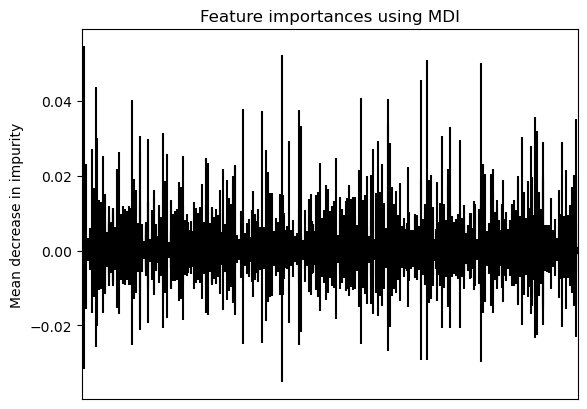

In [57]:
#WRITING
with open('../outputs/feature_importances_liver_volume', "rb") as fp:
    forest_importances = pkl.load(fp)
fp.close()
#WRITING
with open('../outputs/feature_importances_std_liver_volume', "rb") as fp:
    std = pkl.load(fp)
fp.close()

fig, ax = plt.subplots()
# fig.set_figwidth(25)
# fig.set_figheight(20)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
ax.get_xaxis().set_visible(False)
# for i in range(0, len(forest_importances.index), 63):
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=0.3)

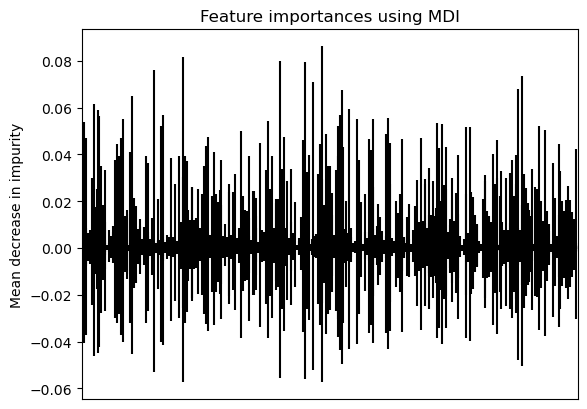

In [5]:
#WRITING
with open('../outputs/feature_importances_right_kidney_volume', "rb") as fp:
    forest_importances = pkl.load(fp)
fp.close()
#WRITING
with open('../outputs/feature_importances_std_right_kidney_volume', "rb") as fp:
    std = pkl.load(fp)
fp.close()

fig2, ax2 = plt.subplots()
# fig2.set_figwidth(25)
# fig2.set_figheight(20)
forest_importances.plot.bar(yerr=std, ax=ax2)
ax2.set_title("Feature importances using MDI")
ax2.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
ax2.get_xaxis().set_visible(False)
# for i in range(0, len(forest_importances.index), 63):
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=0.3)

# Subjects with volumes

In [42]:
volume_fields = ["eid", "21080-2.0", "21081-2.0", "21082-2.0", "21083-2.0", "21084-2.0", "21087-2.0"]
full_ukbb_data = pd.read_csv("../../../../../../vol/aimspace/projects/ukbb/668815/ukb668815_imaging.csv", usecols=volume_fields)
new_names = {'21080-2.0':'liver', '21081-2.0':'left_kidney', '21082-2.0':'right_kidney', '21083-2.0':'spleen', '21087-2.0':'pancreas'}
full_ukbb_data = full_ukbb_data.rename(index=str, columns=new_names)
vertices_path = "../../../../../../vol/aimspace/users/wyo/latent_spaces/vertices_prediction/liver"
dirs = next(os.walk(vertices_path))[2]

In [43]:
full_ukbb_data.dropna(axis=0)
subjects_with_volume = full_ukbb_data.dropna(axis=0)["eid"]
np_subjects_with_volume = np.asarray(subjects_with_volume)
sum = 0
common_subjects = []

for subject in np_subjects_with_volume:
    if(str(subject) in dirs):
        common_subjects.append(subject)
        sum = sum + 1

sum

1175

In [44]:
common_subjects = pd.DataFrame(common_subjects)
# common_subjects.to_csv("../data/ukbb_vol_dirs.csv", index = False)

# Random forest Baseline

In [29]:
basic_features = pd.read_csv("../data/basic_features.csv")
basic_features = basic_features.dropna()
basic_features = basic_features.reset_index()
new_names = {'21003-2.0':'age', '31-0.0':'sex', '21001-2.0':'bmi', '21002-2.0':'weight','50-2.0':'height'}
basic_features = basic_features.rename(index=str, columns=new_names)
mean_basic_features = basic_features.mean().round(2)
mean_basic_features

index      251274.28
eid       3512759.45
age            64.50
sex             0.48
bmi            26.63
weight         76.36
height        169.05
dtype: float64

In [24]:
rmse = {"age":0, "height":0, "weight":0, "bmi":0}
sum = 0
for index, row in basic_features.iterrows():
    sum = sum + 1
    rmse["age"] = rmse["age"] + ((row["age"] - mean_basic_features["age"])**2)
    rmse["height"] = rmse["height"] + ((row["height"] - mean_basic_features["height"])**2)
    rmse["weight"] = rmse["weight"] + ((row["weight"] - mean_basic_features["weight"])**2)
    rmse["bmi"] = rmse["bmi"] + ((row["bmi"] - mean_basic_features["bmi"])**2)


rmse["age"] = ((rmse["age"])/sum)**0.5
rmse["height"] = ((rmse["height"])/sum)**0.5
rmse["weight"] = ((rmse["weight"])/sum)**0.5
rmse["bmi"] = ((rmse["bmi"])/sum)**0.5

rmse

{'age': 7.803561311141574,
 'height': 9.262172198930589,
 'weight': 15.37722249272951,
 'bmi': 4.492407631758116}

In [50]:
full_ukbb_data_no_nan = full_ukbb_data.dropna()
full_ukbb_data_no_nan = full_ukbb_data_no_nan.reset_index()
new_names = {'21080-2.0':'liver', '21081-2.0':'left_kidney', '21082-2.0':'right_kidney', '21083-2.0':'spleen', '21087-2.0':'pancreas'}
full_ukbb_data_no_nan = full_ukbb_data_no_nan.rename(index=str, columns=new_names)
full_ukbb_data_mean = full_ukbb_data_no_nan.mean().round(2)
full_ukbb_data_mean

index                  inf
eid             3499134.45
liver                 1.45
left_kidney           0.14
right_kidney          0.14
spleen                0.17
21084-2.0             2.58
pancreas              0.06
dtype: float64

In [51]:
rmse = {"liver":0, "spleen":0, "pancreas":0, "left_kidney":0, "right_kidney":0}
sum = 0
for index, row in full_ukbb_data_no_nan.iterrows():
    sum = sum + 1
    rmse["liver"] = rmse["liver"] + ((row["liver"] - full_ukbb_data_mean["liver"])**2)
    rmse["liver"] = rmse["spleen"] + ((row["spleen"] - full_ukbb_data_mean["spleen"])**2)
    rmse["liver"] = rmse["pancreas"] + ((row["pancreas"] - full_ukbb_data_mean["pancreas"])**2)
    rmse["liver"] = rmse["left_kidney"] + ((row["left_kidney"] - full_ukbb_data_mean["left_kidney"])**2)
    rmse["liver"] = rmse["right_kidney"] + ((row["right_kidney"] - full_ukbb_data_mean["right_kidney"])**2)


rmse["liver"] = ((rmse["liver"])/sum)**0.5
rmse["spleen"] = ((rmse["spleen"])/sum)**0.5
rmse["pancreas"] = ((rmse["pancreas"])/sum)**0.5
rmse["left_kidney"] = ((rmse["left_kidney"])/sum)**0.5
rmse["right_kidney"] = ((rmse["right_kidney"])/sum)**0.5

rmse

{'liver': 0.00019162575196074425,
 'spleen': 0.0,
 'pancreas': 0.0,
 'left_kidney': 0.0,
 'right_kidney': 0.0}

In [5]:
body_fields = ["eid", "22407-2.0", "22408-2.0", "31-0.0"]
full_ukbb_data = pd.read_csv("../../../../../../vol/aimspace/projects/ukbb/668815/ukb668815_imaging.csv", usecols=body_fields)
label = {"VAT": "22407-2.0", "ASAT": "22408-2.0", "sex": "31-0.0"}
full_ukbb_data = full_ukbb_data.dropna()
full_ukbb_data = full_ukbb_data.reset_index()
new_names = {'22407-2.0':'VAT', '31-0.0':'sex', '22408-2.0':'ASAT'}
full_ukbb_data = full_ukbb_data.rename(index=str, columns=new_names)
mean_full_ukbb_data = full_ukbb_data.mean().round(2)
mean_full_ukbb_data

index      27183.93
eid      3517925.11
sex            0.48
VAT            3.75
ASAT           6.97
dtype: float64

In [7]:
rmse = {"VAT":0, "ASAT":0}
sum = 0
for index, row in full_ukbb_data.iterrows():
    sum = sum + 1
    rmse["VAT"] = rmse["VAT"] + ((row["VAT"] - mean_full_ukbb_data["VAT"])**2)
    rmse["ASAT"] = rmse["ASAT"] + ((row["ASAT"] - mean_full_ukbb_data["ASAT"])**2)


rmse["VAT"] = ((rmse["VAT"])/sum)**0.5
rmse["ASAT"] = ((rmse["ASAT"])/sum)**0.5

rmse

{'VAT': 2.2628160819113368, 'ASAT': 3.181288828443339}